### Project Outline.

You will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data, you will determine what it takes to be one of the best tennis players in the world.

“Game, Set, Match!”

No three words are sweeter to hear as a tennis player than those, which indicate that a player has beaten their opponent. While you can head down to your nearest court and aim to overcome your challenger across the net without much practice, a league of professionals spends day and night, month after month practicing to be among the best in the world. Today you will put your linear regression knowledge to the test to better understand what it takes to be an all-star tennis player.

### Goals: Always Set Them. 

It is vital that we set a clear goal/goals when working on a project, here I am going to look to understand and model what it takes to win tennis game and earn as much money as possible. 

### Data: What Are We Working With?

In this project we are working with data from the Association of Tennis Professionals (ATP) data, this is the governing body of mens professional tennis. The following list splits the features of the dataset into simple categories.

Identifying Data
- Player: name of the tennis player
- Year: year data was recorded

Service Game Columns (Offensive)
- Aces: number of serves by the player where the receiver does not touch the ball
- DoubleFaults: number of times player missed both first and second serve attempts
- FirstServe: % of first-serve attempts made
- FirstServePointsWon: % of first-serve attempt points won by the player
- SecondServePointsWon: % of second-serve attempt points won by the player
- BeakPointsFaced: number of times where the receiver could have won service game of the player
- BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance
- ServiceGamesPlayed: total number of games where the player served
- ServiceGamesWon: total number of games where the player served and won
- TotalServicePointsWon: % of points in games where the player served that they won

Return Game Columns (Defensive)
- FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win
- SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win
- BreakPointsOpportunities: number of times where the player could have won the service game of the opponent
- BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance
- ReturnGamesPlayed: total number of games where the player’s opponent served
- ReturnGamesWon: total number of games where the player’s opponent served and the player won
- ReturnPointsWon: total number of points where the player’s opponent served and the player won
- TotalPointsWon: % of points won by the player

Outcomes
- Wins: number of matches won in a year
- Losses: number of matches lost in a year
- Winnings: total winnings in USD($) in a year
- Ranking: ranking at the end of year

In [166]:
# Imports. 
import pandas as pd
import numpy as np
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Loading the Data In

In [71]:
tennis_data = pd.read_csv('tennis_stats.csv')

## Generic Investigation. 
tennis_data.head()
# tennis_data.info() 

## Understanding string data. 
# print(tennis_data['Player'][:5])

## Checking for missing values. 
# print(tennis_data.isna().sum()) ## No Missing Values. 



,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


### Exploratory Data Analysis

In [67]:
## Description. 
tennis_data.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


In [121]:
## Remove un-needed data. 
numerical_tennis = tennis_data.drop(columns=['Player', 'Year'])


Before looking at using statistical analysis to find the features that correlate most with winning and winnings lets get a visual look at what our data is doing. To do this, we can plot a scatter plot comparing the offensive features with the outcome variables of interest and another scatter plot comparing the defensive features with the outcomes of interest. 

Text(0.5, 1.05, 'Defensive Features vs Outcomes.')

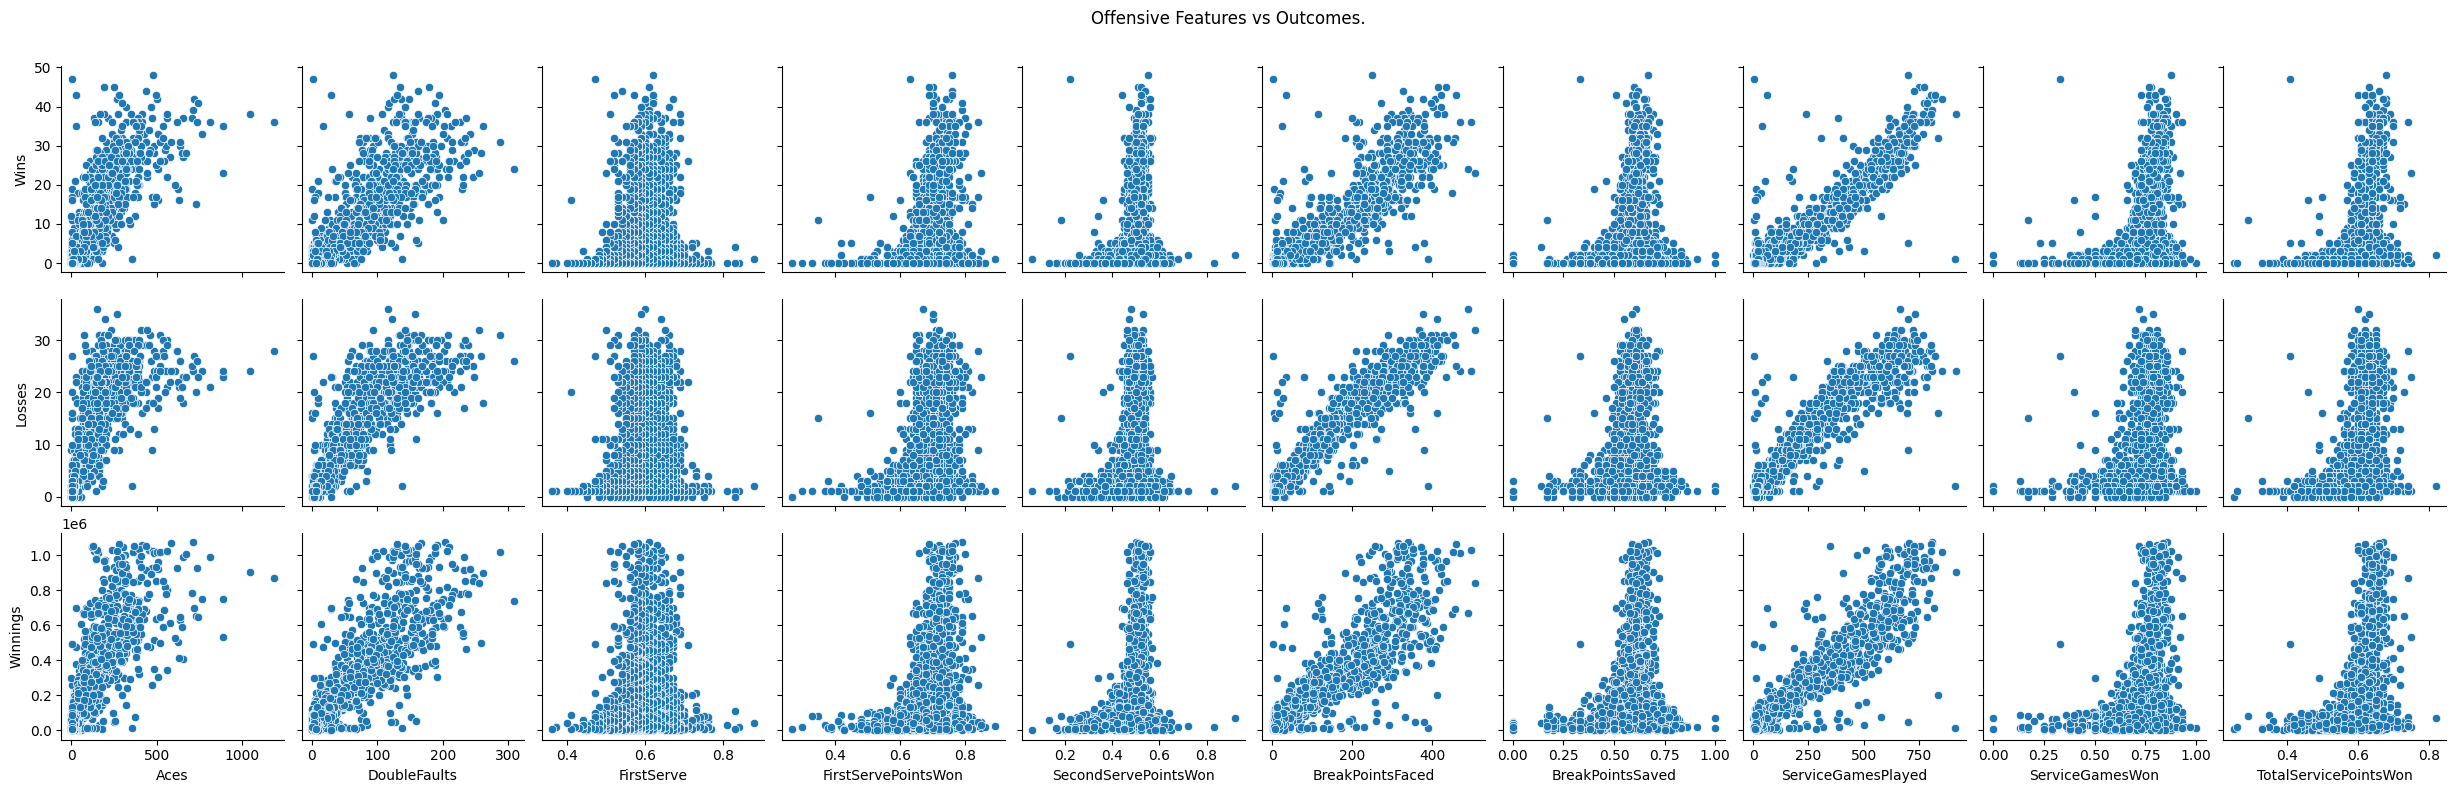

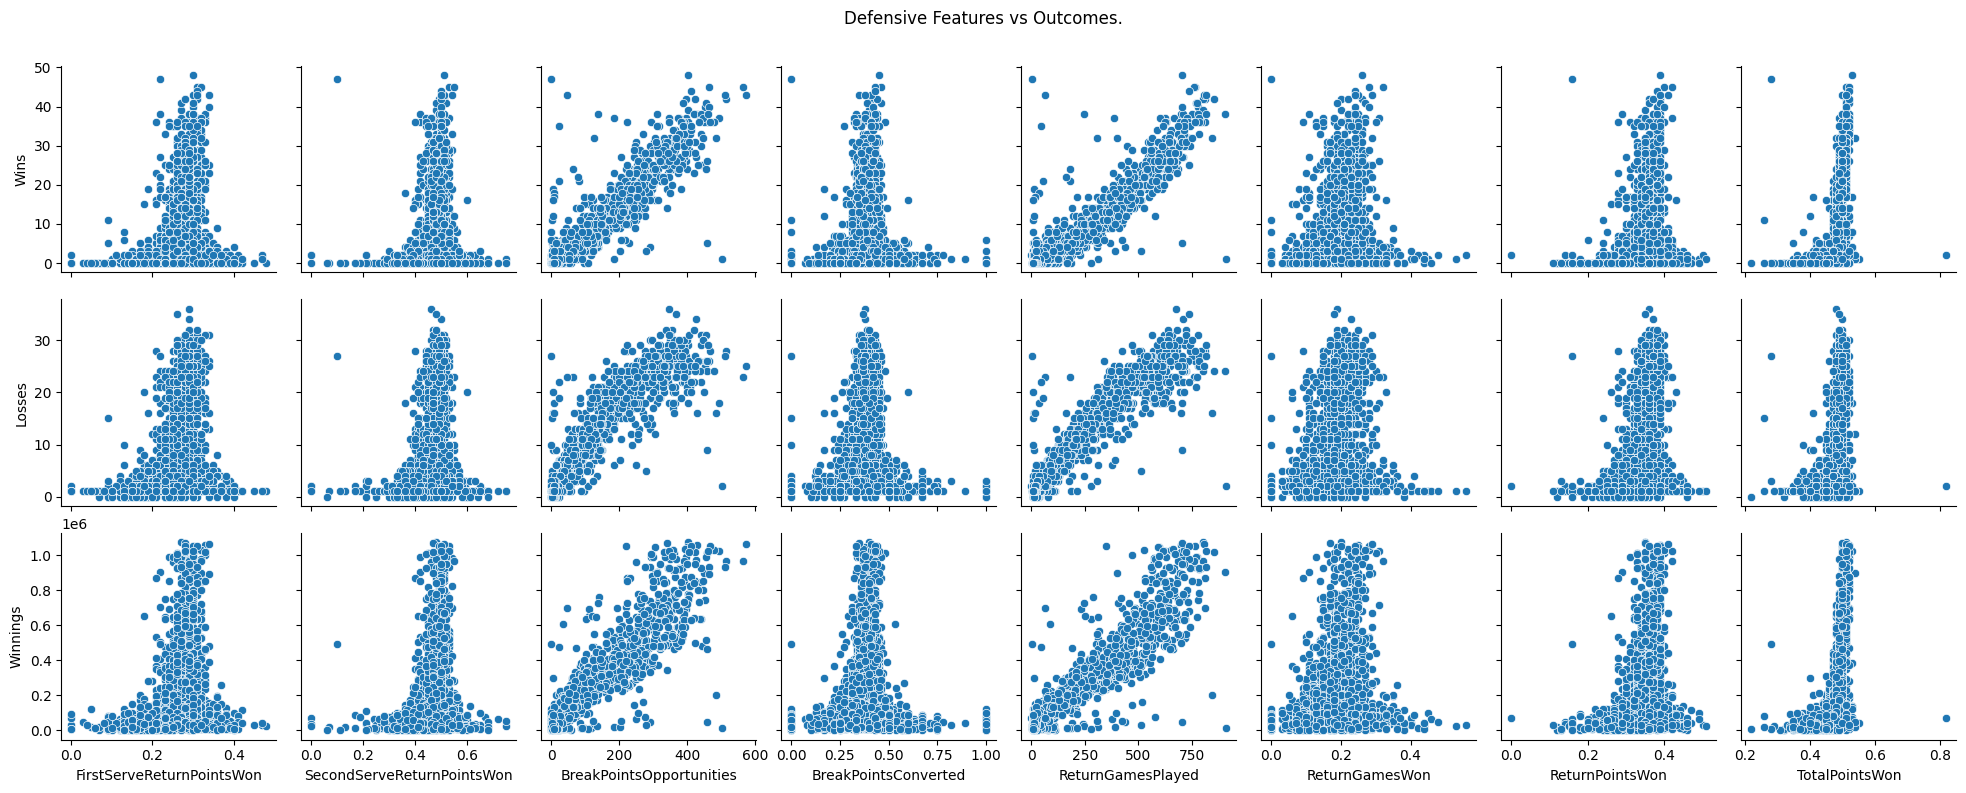

In [122]:
## Scatter Plots

offensive = ['Aces', 'DoubleFaults',  'FirstServe', 'FirstServePointsWon', 'SecondServePointsWon',
            'BreakPointsFaced', 'BreakPointsSaved', 'ServiceGamesPlayed', 'ServiceGamesWon', 
            'TotalServicePointsWon']

defensive = ['FirstServeReturnPointsWon', 'SecondServeReturnPointsWon', 'BreakPointsOpportunities',
            'BreakPointsConverted', 'ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon',
            'TotalPointsWon']

outcomes = ['Wins', 'Losses', 'Winnings']

## Offensive vs outcomes. 
figure = sns.pairplot(data=numerical_tennis, x_vars=offensive, y_vars=outcomes)
figure.fig.suptitle("Offensive Features vs Outcomes.", y=1.05)

## Defensive vs outcomes
figure = sns.pairplot(data=numerical_tennis, x_vars=defensive, y_vars=outcomes)
figure.fig.suptitle("Defensive Features vs Outcomes.", y=1.05)

Looking at the offensive features, it seems that the features that show a strong correlation with either of the outcomes of interest appear to also have a correlation with the rest of the outcomes of interest. The two features that stand out to me are Break Points Faced and Service Games Played. Double Faults also appears to show a correlation with the outcomes of interest, but it is important when looking at these scatter graphs, that correlation does not always equal causation. 

Looking at the defensive features, it appears again that if a feature is correlated with any of the outcomes of interest, it is also correlated with all the outcomes of interest in some respect. The features that stand out to me are Break Point Opportunities and Return Games Played.

But all we have done so far is visualize our correlations, lets run some stats and see what we come up with. To do this we are going to use the pandas corr() method, this allows us to compute the pairwise correlation coefficient between the features in the dataset. Importantly, we are going to use Pearson's r correlation coefficient. This is a measure a linear correlation between each of the two features in the data. 0 indicates no linear correlation between the features, 1 indicates a strong positive linear correlation between the features and -1 indicates a strong negative linear correlation between the features.

Lets look at and plot the correlation coefficients between the features and winning, loosing and winnings.

In [123]:
## Linear Correlations.
corrleations = numerical_tennis.corr()
corrleations

,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
FirstServe,1.000000,-0.070659,0.025488,0.101417,-0.001924,0.048149,-0.018877,0.057709,0.062345,0.087945,...,-0.010676,0.004189,0.071920,0.137473,0.148349,0.180996,0.064832,0.053736,0.057882,-0.068759
FirstServePointsWon,-0.070659,1.000000,0.021729,0.320765,-0.004724,0.460323,-0.041538,0.301925,0.324853,0.405751,...,-0.010193,-0.002793,0.376460,0.817829,0.648753,0.860033,0.356702,0.330581,0.361121,-0.150004
FirstServeReturnPointsWon,0.025488,0.021729,1.000000,0.072707,0.301265,0.140165,0.324057,0.295724,0.313338,0.048347,...,0.757435,0.834267,0.261206,0.091319,0.496682,0.052335,0.256029,0.243278,0.240808,-0.178664
SecondServePointsWon,0.101417,0.320765,0.072707,1.000000,0.103584,0.266269,0.052755,0.258691,0.277782,0.340147,...,0.096622,0.095585,0.296809,0.650764,0.622673,0.713076,0.268979,0.250918,0.281215,-0.181013
SecondServeReturnPointsWon,-0.001924,-0.004724,0.301265,0.103584,1.000000,0.095494,0.264413,0.234212,0.249583,0.073867,...,0.603755,0.727338,0.209521,0.096553,0.408975,0.055004,0.193093,0.185217,0.199401,-0.159592
Aces,0.048149,0.460323,0.140165,0.266269,0.095494,1.000000,0.037188,0.757405,0.784934,0.282672,...,0.139987,0.138023,0.866138,0.440922,0.428679,0.472101,0.825301,0.768628,0.798404,-0.277811
BreakPointsConverted,-0.018877,-0.041538,0.324057,0.052755,0.264413,0.037188,1.000000,0.096368,0.086502,-0.015956,...,0.561759,0.387170,0.083182,-0.025670,0.255050,-0.007254,0.076989,0.062297,0.075022,-0.051005
BreakPointsFaced,0.057709,0.301925,0.295724,0.258691,0.234212,0.757405,0.096368,1.000000,0.973352,0.271783,...,0.335205,0.331043,0.971296,0.354012,0.463110,0.354005,0.883470,0.943309,0.876036,-0.322082
BreakPointsOpportunities,0.062345,0.324853,0.313338,0.277782,0.249583,0.784934,0.086502,0.973352,1.000000,0.247996,...,0.358483,0.352783,0.978278,0.372271,0.491198,0.380716,0.923453,0.909295,0.900444,-0.334548
BreakPointsSaved,0.087945,0.405751,0.048347,0.340147,0.073867,0.282672,-0.015956,0.271783,0.247996,1.000000,...,0.046127,0.054317,0.274677,0.518091,0.464380,0.476143,0.252053,0.246990,0.258271,-0.121220


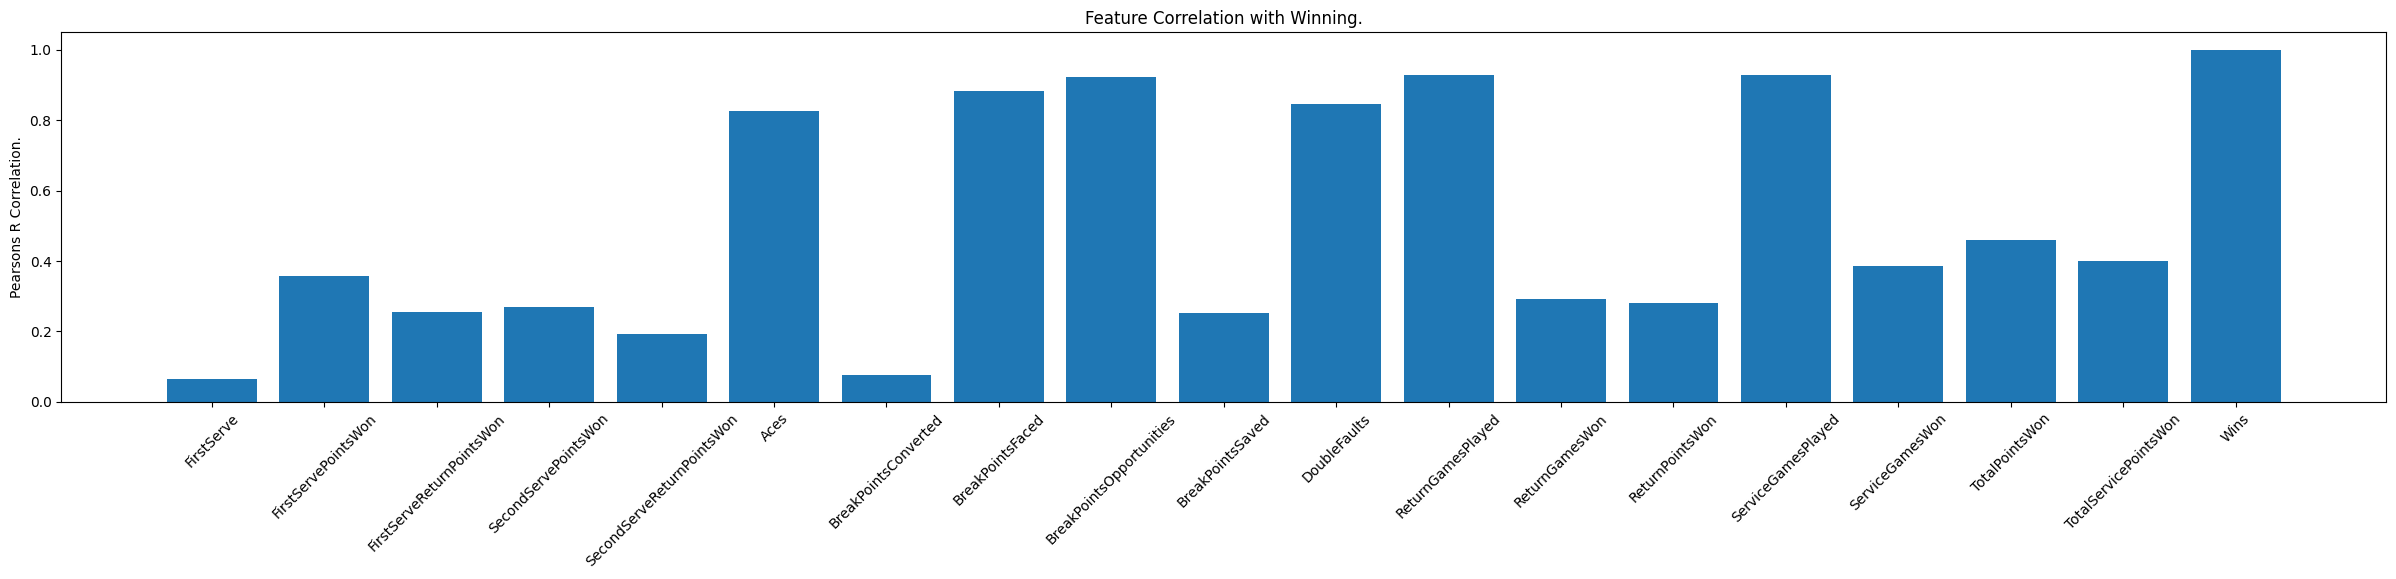

In [124]:
## Lets look at the Pearson's R correlation with the Wins outcome. 
wins_corr = numerical_tennis.drop(columns=['Winnings', 'Losses', 'Ranking']).corr()
x_axis = wins_corr['Wins'].index
y_axis = wins_corr['Wins'].to_numpy()

fig, ax = plt.subplots()

ax.bar(x_axis, y_axis)
fig.set_figwidth(30)
ax.set_ylabel('Pearsons R Correlation.')
ax.set_title("Feature Correlation with Winning.")
ax.tick_params(axis='both', which='minor', labelsize=5)
plt.xticks(rotation=45)

ax.autoscale()
plt.show()


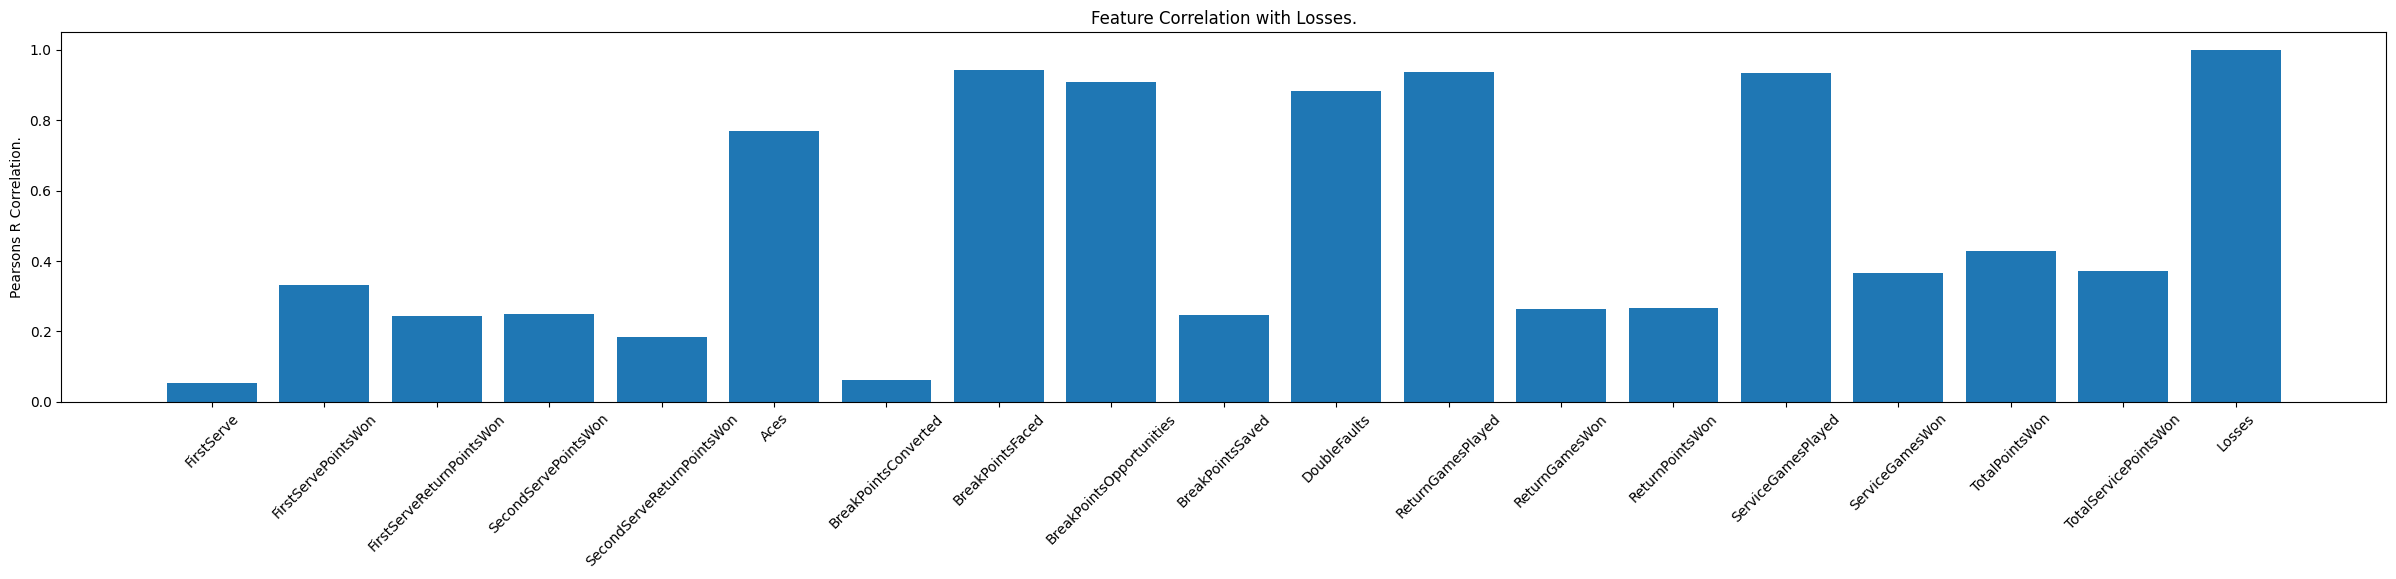

In [125]:
## Lets look at the Pearson's R correlation between Features and Loosing outcome. 
losses_corr = numerical_tennis.drop(columns=['Winnings', 'Wins', 'Ranking']).corr()
x_axis = losses_corr['Losses'].index
y_axis = losses_corr['Losses'].to_numpy()

fig, ax = plt.subplots()

ax.bar(x_axis, y_axis)
fig.set_figwidth(30)
ax.set_ylabel('Pearsons R Correlation.')
ax.set_title("Feature Correlation with Losses.")
ax.tick_params(axis='both', which='minor', labelsize=5)
plt.xticks(rotation=45)

ax.autoscale()
plt.show()

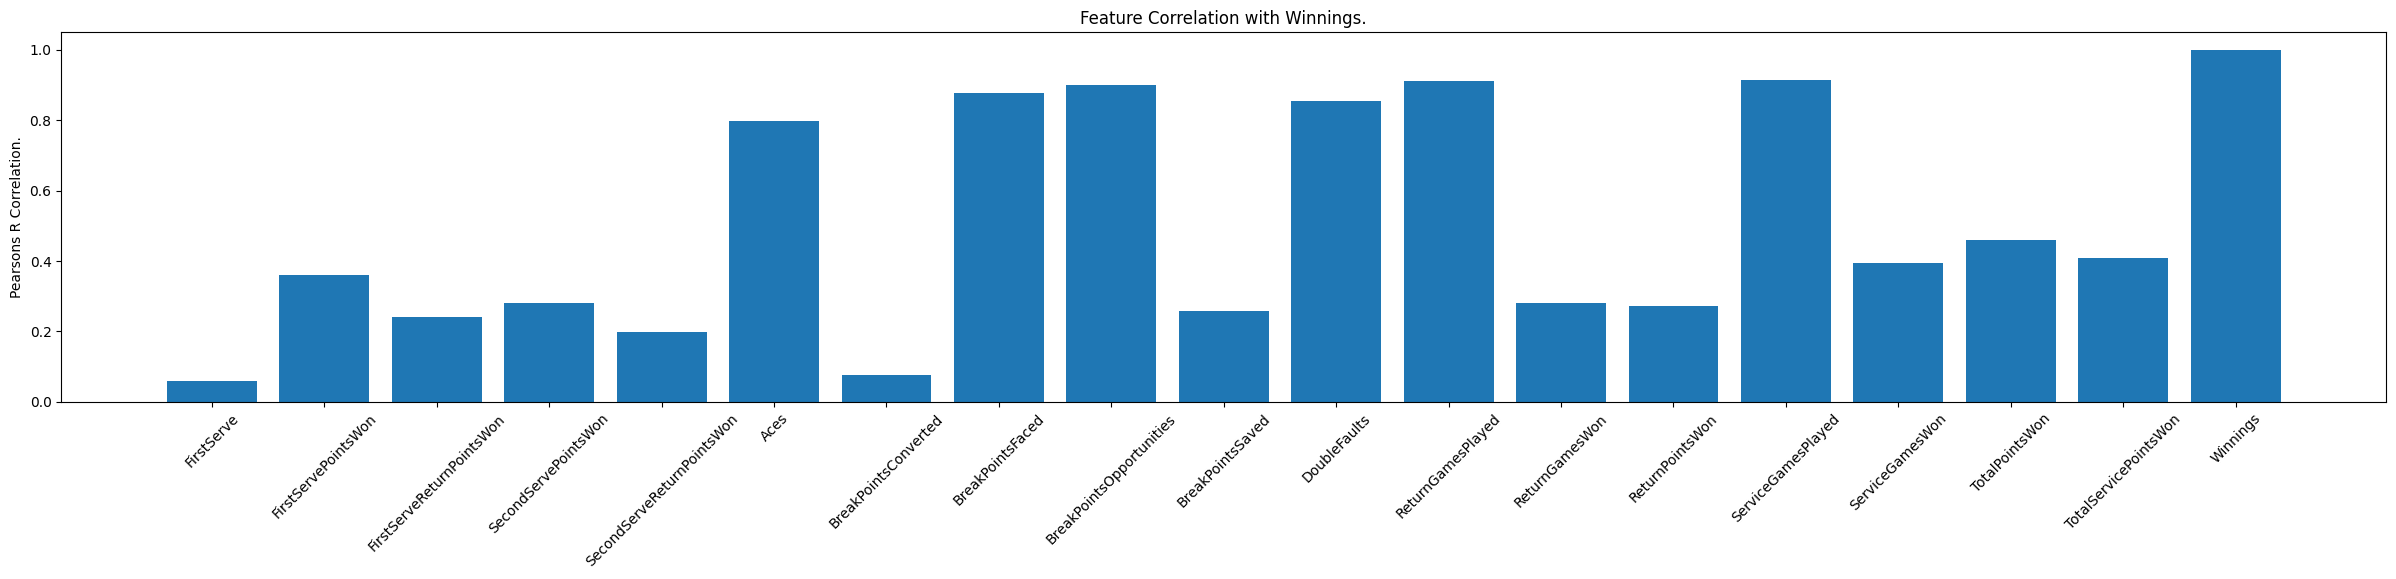

In [126]:
## Lets look at the Pearson's R correlation between Features and Loosing outcome. 
winnings_corr = numerical_tennis.drop(columns=['Losses', 'Wins', 'Ranking']).corr()
x_axis = winnings_corr['Winnings'].index
y_axis = winnings_corr['Winnings'].to_numpy()

fig, ax = plt.subplots()

ax.bar(x_axis, y_axis)
fig.set_figwidth(30)
ax.set_ylabel('Pearsons R Correlation.')
ax.set_title("Feature Correlation with Winnings.")
ax.tick_params(axis='both', which='minor', labelsize=5)
plt.xticks(rotation=45)

ax.autoscale()
plt.show()

Great, looking at these graphs we can see that there are some clear correlations between certain features in the dataset and the outcomes we have been looking at. Interestingly, it appears that the same features are all strong predictors of the outcomes. 

The features with the highest Pearson's r:
- Aces
- Break Points Faced
- Break Points Opportunities
- Double Faults
- Return Games Played
- Service Games Played

The fact that return and service games played are both strong predictors of the target makes me feel that "experience" might be a strong attribute for a tennis player to have in order to maximize their winnings and wins throughout the year. But the more games you play, the more losses you might incur.

The fact that we have high correlation coefficient means nothing if the data we have is a result of "chance", to prove that our results are significant, lets look at the p-values for our tests, we are going to collect all the features with a p-value $\leq 0.05$ and order them. 

In [127]:
wins_correlations = pg.pairwise_corr(numerical_tennis.drop(columns=['Winnings', 'Losses', 'Ranking']).corr())
losing_correlations = pg.pairwise_corr(numerical_tennis.drop(columns=['Winnings', 'Wins', 'Ranking']).corr())
winnings_correlations = pg.pairwise_corr(numerical_tennis.drop(columns=['Losses', 'Wins', 'Ranking']).corr())

## Gather the features where P is less than 0.05
wins = wins_correlations[(wins_correlations['Y'] == 'Wins') & (wins_correlations['p-unc'] < 0.05)] 
losses = losing_correlations[(losing_correlations['Y'] == 'Losses') & (losing_correlations['p-unc'] < 0.05)]
winnings = winnings_correlations[(winnings_correlations['Y'] == 'Winnings') & (winnings_correlations['p-unc'] < 0.05)]


print(wins.sort_values(by=['r'], ascending=False))

                            X     Y   method alternative   n         r   
164        ServiceGamesPlayed  Wins  pearson   two-sided  19  0.995352  \
149         ReturnGamesPlayed  Wins  pearson   two-sided  19  0.995297   
125  BreakPointsOpportunities  Wins  pearson   two-sided  19  0.990472   
142              DoubleFaults  Wins  pearson   two-sided  19  0.986674   
115          BreakPointsFaced  Wins  pearson   two-sided  19  0.986261   
92                       Aces  Wins  pearson   two-sided  19  0.957599   

            CI95%         p-unc       BF10  power  
164   [0.99, 1.0]  1.010236e-18  6.487e+14    1.0  
149   [0.99, 1.0]  1.114626e-18  5.948e+14    1.0  
125   [0.97, 1.0]  4.433394e-16  3.026e+12    1.0  
142  [0.96, 0.99]  7.579996e-15  2.473e+11    1.0  
115  [0.96, 0.99]  9.810951e-15  1.969e+11    1.0  
92   [0.89, 0.98]  1.286651e-10  4.603e+07    1.0  


In [128]:
print(losses.sort_values(by=['r'], ascending=False))

                            X       Y   method alternative   n         r   
149         ReturnGamesPlayed  Losses  pearson   two-sided  19  0.995691  \
164        ServiceGamesPlayed  Losses  pearson   two-sided  19  0.995510   
115          BreakPointsFaced  Losses  pearson   two-sided  19  0.994436   
125  BreakPointsOpportunities  Losses  pearson   two-sided  19  0.991851   
142              DoubleFaults  Losses  pearson   two-sided  19  0.990849   
92                       Aces  Losses  pearson   two-sided  19  0.941808   

            CI95%         p-unc       BF10  power  
149   [0.99, 1.0]  5.304223e-19  1.145e+15    1.0  
164   [0.99, 1.0]  7.528551e-19  8.409e+14    1.0  
115   [0.99, 1.0]  4.641651e-18   1.69e+14    1.0  
125   [0.98, 1.0]  1.179277e-16  9.733e+12    1.0  
142   [0.98, 1.0]  3.149830e-16  4.091e+12    1.0  
92   [0.85, 0.98]  1.797112e-09  4.509e+06    1.0  


In [129]:
print(winnings.sort_values(by=['r'], ascending=False))

                            X         Y   method alternative   n         r   
164        ServiceGamesPlayed  Winnings  pearson   two-sided  19  0.993618  \
149         ReturnGamesPlayed  Winnings  pearson   two-sided  19  0.993576   
142              DoubleFaults  Winnings  pearson   two-sided  19  0.987637   
125  BreakPointsOpportunities  Winnings  pearson   two-sided  19  0.986973   
115          BreakPointsFaced  Winnings  pearson   two-sided  19  0.983950   
92                       Aces  Winnings  pearson   two-sided  19  0.956363   

            CI95%         p-unc       BF10  power  
164   [0.98, 1.0]  1.485859e-17  6.053e+13    1.0  
149   [0.98, 1.0]  1.571158e-17  5.762e+13    1.0  
142   [0.97, 1.0]  4.019563e-15  4.327e+11    1.0  
125   [0.97, 1.0]  6.253450e-15   2.93e+11    1.0  
115  [0.96, 0.99]  3.649755e-14  6.181e+10    1.0  
92   [0.89, 0.98]  1.635628e-10  3.726e+07    1.0  


We can now take the top 5 features of each target and save them for later. 

Wins
- ServiceGamesPlayed
- ReturnGamesPlayed
- BreakPointsOpportunities
- DoubleFaults
- BreakPointsFaced

Losses
- ReturnGamesPlayed
- ServiceGamesPlayed
- BreakPointsFaced
- BreakPointsOpportunities
- DoubleFaults

Winnings
- ServiceGamesPlayed
- ReturnGamesPlayed
- DoubleFaults
- BreakPointsOpportunities
- BreakPointsFaced

As you can see, the same features have popped up each tine, just in a slightly different order. 


### Models

Lets now train some models.

1st - Train a single feature linear regression model to predict the wins of a player in a year.

2nd - Train a double feature linear regression model to predict the winnings of a player in a year.

3rd - Train a multiple feature linear regression model to predict the winnings of a player in a year. 

Based on our analysis, if we want to predict the number of wins a player has in a year, we can look at the number of games they have served in, the number of games their opponent has served in and the number of break point opportunities that have had in a game. Lets train a linear regression model on the number of breakpoint opportunities that a player has had as has a very high correlation, with a strong significance. Furthermore, I feel it provides a bit more insight than looking at the number of times they or they opponent has served.  

Training Set:
0.8449360511398338
Test Set
0.8841013286931908


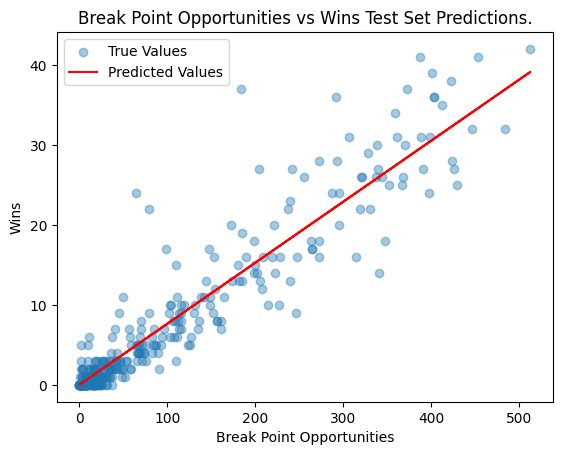

In [150]:
## Perform single feature linear regressions here:
X_data = numerical_tennis['BreakPointsOpportunities'].values.reshape(-1, 1)
Y_data = numerical_tennis['Wins'].values

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size=0.8)

linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
## R2 score.
print('Training Set:')
print(linear_reg.score(X_train, Y_train))

Y_predictions = linear_reg.predict(X_test)
## R2 score.
print('Test Set')
print(linear_reg.score(X_test, Y_test))

## Visualize the model.
fig, ax = plt.subplots()

plt.scatter(X_test, Y_test, alpha=0.4, label="True Values")
plt.plot(X_test, Y_predictions, color='r', label='Predicted Values')
ax.set_xlabel("Break Point Opportunities")
ax.set_ylabel("Wins")
ax.set_title("Break Point Opportunities vs Wins Test Set Predictions.")
ax.legend()
plt.show()

If we want to predict the winnings of a player for a year using two features, we can use the number of double faults the player has the alongside number of breakpoint opportunities that the player had in a year. The best features appear to be the number of games where the player served and the number of games the players opponent served, lets compare the each group of features and see which produces the best model. 

Training Set:
0.8094217525309064
Test Set
0.8516677290255349


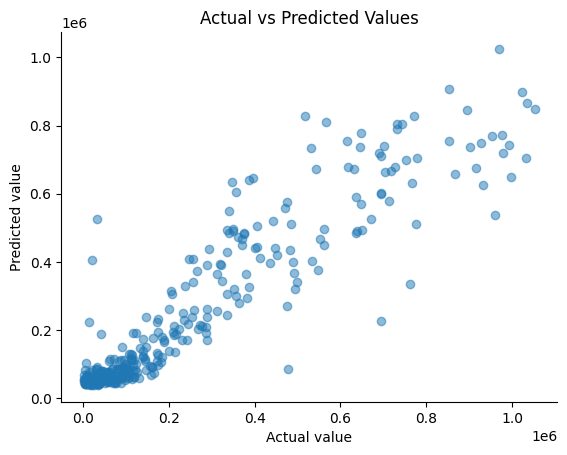

Training Set:
0.8242928838727339
Test Set
0.8668184827309509


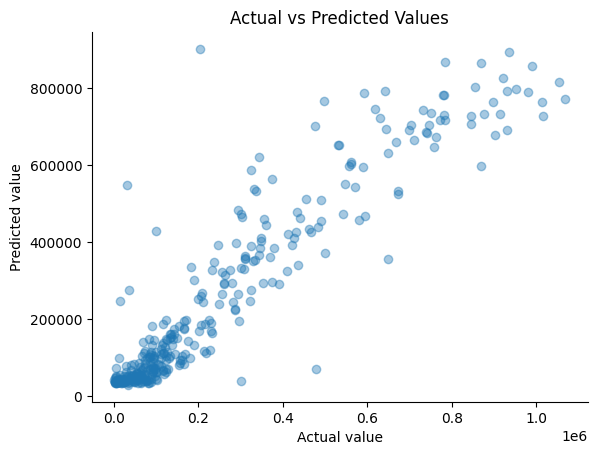

In [164]:
## Perform two feature linear regressions here:
features1 = ['BreakPointsOpportunities', 'DoubleFaults']
features2 = ['ServiceGamesPlayed', 'ReturnGamesPlayed']

## Evaluate the first set of features. 
X = numerical_tennis[features1]
Y = numerical_tennis['Winnings']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

features1_lin_reg = LinearRegression()
features1_lin_reg.fit(X_train, Y_train)
## R2 score.
print('Training Set:')
print(features1_lin_reg.score(X_train, Y_train))

Y_predictions = features1_lin_reg.predict(X_test)
## R2 score.
print('Test Set')
print(features1_lin_reg.score(X_test, Y_test))

plt.scatter(Y_test, Y_predictions, alpha=.5)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted Values')
sns.despine()
plt.show()


## Evaluate the second set of features. 
X = numerical_tennis[features2]
Y = numerical_tennis['Winnings']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

features1_lin_reg = LinearRegression()
features1_lin_reg.fit(X_train, Y_train)
## R2 score.
print('Training Set:')
print(features1_lin_reg.score(X_train, Y_train))

Y_predictions = features1_lin_reg.predict(X_test)
## R2 score.
print('Test Set')
print(features1_lin_reg.score(X_test, Y_test))

plt.scatter(Y_test, Y_predictions, alpha=.4)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted Values')
sns.despine()
plt.show()


Lets now use the full top 5 list of features to predict the yearly winnings of a tennis player to see if we achieve a higher R2 score. 

Training Set:
0.836901613923564
Test Set
0.8565620085780186


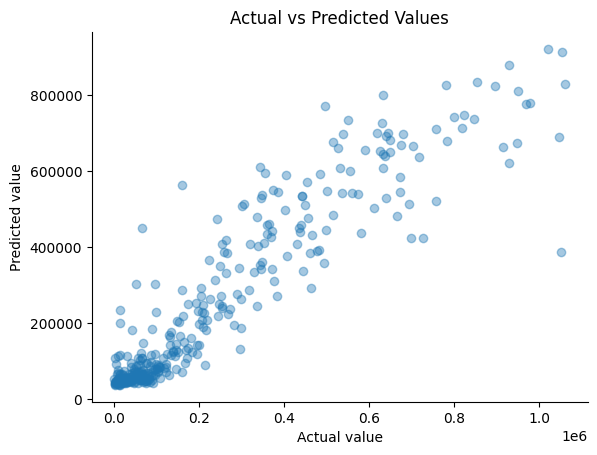

In [165]:
## Perform multiple feature linear regressions here:

multi_features = ['ServiceGamesPlayed', 'ReturnGamesPlayed', 'DoubleFaults', 'BreakPointsOpportunities', 'BreakPointsFaced']

X = numerical_tennis[multi_features]
Y = numerical_tennis['Winnings']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
multi_lin_reg = LinearRegression()
multi_lin_reg.fit(X_train, Y_train)
## R2 score.
print('Training Set:')
print(multi_lin_reg.score(X_train, Y_train))

Y_predictions = multi_lin_reg.predict(X_test)
## R2 score.
print('Test Set')
print(multi_lin_reg.score(X_test, Y_test))


plt.scatter(Y_test, Y_predictions, alpha=.4)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted Values')
sns.despine()
plt.show()


### Review


In this project, we aimed to use regression analysis to investigate what it takes to be the best player in the world.

We found certain features correlate well with the number of games won in a year and the amount of earnings in USD a year. 

- ServiceGamesPlayed
- ReturnGamesPlayed
- BreakPointsOpportunities
- DoubleFaults
- BreakPointsFaced

To find these features, we used pearson's R correlation coefficient to show if the feature has positive, negative or no correlation to the target variable. From there, we used p-values to confirm that these relationships were not by chance.

From this, we can determine that in order to increase their earnings and the games that the player will win, they need to.

1. Increase the number of games they play (ServiceGamesPlayed, ReturnGamesPlayed)
2. Increase the number of times they can break the opponents serve. (BreakPointsOpportunities)

Using $R^2$ value, we are able to see the proportion of the variability in the outcome variable that can be explained by a predictor variable. With this, we can see that break point opportunities accounts for 88% of variance in winning, suggesting that it could be a strong predictor of how many games a tennis player will win. Alongside that, we found that we can produce models that explain the changes in yearly earnings of a player with an $R^2$ score of 86%, however we found that using more features appear to decrease the models ability to explain the changes. 